<a href="https://colab.research.google.com/github/Vixuz144/Admin-Prod/blob/main/Proyecto_Shamar_Balones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Plan General de Producción

In [2]:
dias = [22, 20, 21, 22, 22, 20, 23, 22, 20, 23, 21, 21]
print(sum(dias))

257


In [3]:
def pgp_const(demandas, tasa_prod, no_dias, inv0, c_inv, c_fab):
  #per = np.arange(1, periodos+1)
  n = len(demandas)
  col = ['No. Días', 'No. Personas', 'Tasa de producción', 'T.R.', 'Prod. Total', 'Demanda', 'Inv. I.', 'Inv. F.', 'C. Fabricación', 'C. Almacenamiento']

  try:
    ca = c_inv[0]
    ce = c_inv[1]
    col.append('C. Escasez')
  except:
    try:
      ca = c_inv[0]
    except:
      ca = c_inv


  tp = tasa_prod * np.ones(n) * no_dias
  dm = np.mean(demandas)
  if dm/tp.mean() == dm//tp.mean():
    no_p = [dm//tp.mean()]
  else:
    no_p = [np.floor(dm/tp.mean()), np.ceil(dm/tp.mean()), np.round(dm/tp.mean(), 0)]


  tablas, tasas = [], []
  for p in no_p:
    per = p*np.ones(n)
    tr = tp * per
    ts = np.zeros(n)
    ma = np.zeros(n)
    prod_total = np.sum((tr, ts, ma), 0)

    lii, lif = [inv0 - demandas[0]], [inv0 - demandas[0] + prod_total[0]]
    for i in range(1,n):
      lii.append(lif[i-1] - demandas[i])
      lif.append(lii[i] + prod_total[i])

    lf = c_fab * tr
    la, le = [], []
    for i in lii:
      if i >= 0:
        la.append(i * ca)
        try:
          le.append(0 * ce)
        except:
          pass
      else:
        la.append(0)
        try:
          le.append(-i * ce)
        except:
          pass

    try:
      data = np.transpose(np.concatenate([[no_dias], [per], [tp], [tr], [prod_total], [demandas], [lii], [lif], [lf], [la], [le]], 0))
      tablas.append(pd.DataFrame(data, index=np.arange(1,n+1), columns=col))
    except:
      data = np.transpose(np.concatenate([[no_dias], [per], [tp], [tr], [prod_total], [demandas], [lii], [lif], [lf], [la]], 0))
      tablas.append(pd.DataFrame(data, index=np.arange(1,n+1), columns=col))
  return tablas

In [4]:
def pgp_conydes(demandas, tasa_prod, no_dias, no_per0, c_fab, c_con, c_des):
  #per = np.arange(1, periodos+1)
  n = len(demandas)
  tp = tasa_prod * np.ones(n) * no_dias
  if np.all(demandas/tp == demandas//tp):
    no_p = [demandas//tp]
  else:
    no_p = [np.floor(demandas/tp), np.ceil(demandas/tp), np.round(demandas/tp, 0)]

  tablas, tasas = [], []
  for p in no_p:
    col = ['No. Días', 'No. Personas', 'Tasa de producción', 'T.R.', 'Prod. Total', 'Demanda', 'Inv. I.', 'Inv. F.', 'C. Fabricación', 'C. Cont.', 'C. Despido']
    per = p*np.ones(n)
    tr = tp * per
    ts = np.zeros(n)
    ma = np.zeros(n)
    prod_total = np.sum((tr, ts, ma), 0)

    if np.all(prod_total == demandas):
      col.remove('Inv. I.')
      col.remove('Inv. F.')
      data = np.concatenate(([no_dias], [per], [tp], [tr], [prod_total], [demandas]), 0)
    else:
      lii, lif = [0 - demandas[0]], [0 - demandas[0] + prod_total[0]]
      for i in range(1,n):
        lii.append(lif[i-1] - demandas[i])
        lif.append(lii[i] + prod_total[i])
      data = np.concatenate(([no_dias], [per], [tp], [tr], [prod_total], [demandas], [lii], [lif]), 0)

    lf = c_fab * tr

    lc, ld = [], []
    q = np.append(no_per0, p)
    pp = np.array(q[1:]) - np.array(q[:-1])
    for i in pp:
      if i >= 0:
        lc.append(i*c_con)
        ld.append(0)
      else:
        lc.append(0)
        ld.append(-i*c_des)

    data = np.transpose(np.concatenate([data, [lf], [lc], [ld]], 0))
    tablas.append(pd.DataFrame(data, index=np.arange(1,n+1), columns=col))
  return tablas

In [5]:
def pgp_ts(demandas, tasa_prod, no_dias, no_per, porc_ts, inv0, c_fab,  c_tr, c_ts, c_inv):
  n = len(demandas)
  col = ['No. Días', 'No. Personas', 'Tasa de producción', 'T.R.', 'T.S.', 'Prod. Total', 'Demanda', 'Inv. I.', 'Inv. F.', 'C. Fabricación', 'C. Tiempo Regular', 'C. Tiempo Suplementario', 'C. Almacenamiento']

  try:
    ca = c_inv[0]
    ce = c_inv[1]
    col.append('C. Escasez')
  except:
    try:
      ca = c_inv[0]
    except:
      ca = c_inv

  tp = tasa_prod * np.ones(n) * no_dias
  per = no_per * np.ones(n)
  tr = tp * per
  ts = np.zeros(n)
  ma = np.zeros(n)
  prod_total = np.sum((tr, ts, ma), 0)

  lii, lif = [inv0 - demandas[0]], [inv0 - demandas[0] + prod_total[0]]
  for i in range(1,n):
    lii.append(lif[i-1] - demandas[i])
    lif.append(lii[i] + prod_total[i])

  if np.any(np.array(lif) < 0):
    k = np.argmin(lif)
    for i in np.arange(k,-1,-1):
      while ts[i] < porc_ts*tr[i] and np.any(np.array(lif) < 0):
        extra = porc_ts*tr[i]/10
        ts[i] += extra
        prod_total = np.sum((tr, ts, ma), 0)

        lii, lif = [inv0 - demandas[0]], [inv0 - demandas[0] + prod_total[0]]
        for j in range(1,n):
          lii.append(lif[j-1] - demandas[j])
          lif.append(lii[j] + prod_total[j])

  lf = c_fab * prod_total
  lr = c_tr * tr
  ls = c_ts * ts
  la, le = [], []
  for i in lii:
    if i >= 0:
      la.append(i * ca)
      try:
        le.append(0 * ce)
      except:
        pass
    else:
      la.append(0)
      try:
        le.append(-i * ce)
      except:
        pass
  print(no_per)
  try:
    data = np.transpose(np.concatenate([[no_dias], [per], [tp], [tr], [ts], [prod_total], [demandas], [lii], [lif], [lf], [lr], [ls], [la], [le]], 0))
    tabla = pd.DataFrame(data, index=np.arange(1,n+1), columns=col)
  except:
    data = np.transpose(np.concatenate([[no_dias], [per], [tp], [tr], [ts], [prod_total], [demandas], [lii], [lif], [lf], [lr], [ls], [la]], 0))
    tabla = pd.DataFrame(data, index=np.arange(1,n+1), columns=col)
  return tabla

In [6]:
def pgp_ma(demandas, tasa_prod, no_dias, no_per, inv0, c_fab, c_ma, c_a):
  n = len(demandas)
  col = ['No. Días', 'No. Personas', 'Tasa de producción', 'T.R.', 'M.A.', 'Prod. Total', 'Demanda', 'Inv. I.', 'Inv. F.', 'C. Fabricación', 'C. Maquila', 'C. Almacenamiento']

  tp = tasa_prod * np.ones(n) * no_dias
  per = no_per * np.ones(n)
  tr = tp * per
  ts = np.zeros(n)
  ma = np.zeros(n)
  prod_total = np.sum((tr, ts, ma), 0)

  lii, lif = [inv0 - demandas[0]], [inv0 - demandas[0] + prod_total[0]]
  for i in range(1,n):
    lii.append(lif[i-1] - demandas[i])
    lif.append(lii[i] + prod_total[i])
  for i in range(n):
    inv = lii[i] + prod_total[i]
    if inv < 0:
      ma[i] = -inv
      prod_total = np.sum((tr, ts, ma), 0)
      lif[i] = lii[i] + prod_total[i]
      try:
        lii[i+1] = lif[i] - demandas[i+1]
      except:
        pass


  lf = c_fab * prod_total
  lma = c_ma * ma
  la = []
  for i in lii:
    if i >= 0:
      la.append(i * c_a)
    else:
      la.append(0)
  data = np.transpose(np.concatenate([[no_dias], [per], [tp], [tr], [ma], [prod_total], [demandas], [lii], [lif], [lf], [lma], [la]], 0))
  tabla = pd.DataFrame(data, index=np.arange(1,n+1), columns=col)
  return tabla

[1150. 1000.  950. 1100.  800. 1050. 1000.  900.  900.  910.  990. 1250.]


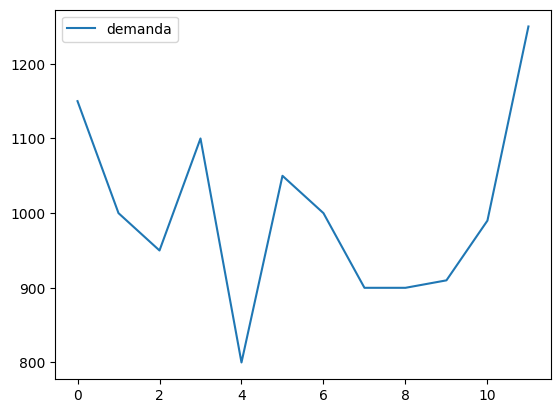

5
    No. Días  No. Personas  Tasa de producción    T.R.  Prod. Total  Demanda  \
1       22.0          11.0                88.0   968.0        968.0   1150.0   
2       20.0          11.0                80.0   880.0        880.0   1000.0   
3       21.0          11.0                84.0   924.0        924.0    950.0   
4       22.0          11.0                88.0   968.0        968.0   1100.0   
5       22.0          11.0                88.0   968.0        968.0    800.0   
6       20.0          11.0                80.0   880.0        880.0   1050.0   
7       23.0          11.0                92.0  1012.0       1012.0   1000.0   
8       22.0          11.0                88.0   968.0        968.0    900.0   
9       20.0          11.0                80.0   880.0        880.0    900.0   
10      23.0          11.0                92.0  1012.0       1012.0    910.0   
11      21.0          11.0                84.0   924.0        924.0    990.0   
12      21.0          11.0            

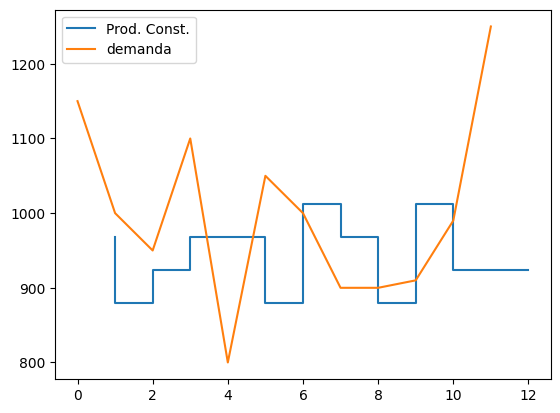

    No. Días  No. Personas  Tasa de producción    T.R.  Prod. Total  Demanda  \
1       22.0          12.0                88.0  1056.0       1056.0   1150.0   
2       20.0          12.0                80.0   960.0        960.0   1000.0   
3       21.0          12.0                84.0  1008.0       1008.0    950.0   
4       22.0          12.0                88.0  1056.0       1056.0   1100.0   
5       22.0          12.0                88.0  1056.0       1056.0    800.0   
6       20.0          12.0                80.0   960.0        960.0   1050.0   
7       23.0          12.0                92.0  1104.0       1104.0   1000.0   
8       22.0          12.0                88.0  1056.0       1056.0    900.0   
9       20.0          12.0                80.0   960.0        960.0    900.0   
10      23.0          12.0                92.0  1104.0       1104.0    910.0   
11      21.0          12.0                84.0  1008.0       1008.0    990.0   
12      21.0          12.0              

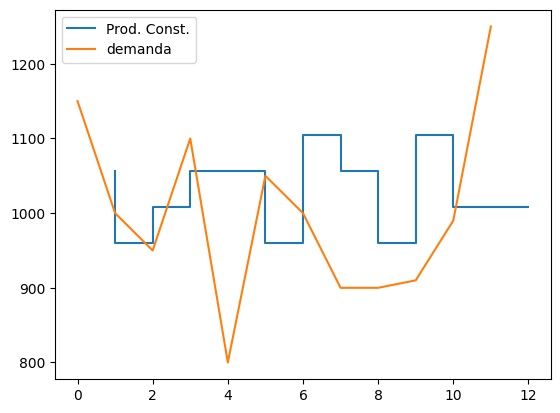

    No. Días  No. Personas  Tasa de producción    T.R.  Prod. Total  Demanda  \
1       22.0          12.0                88.0  1056.0       1056.0   1150.0   
2       20.0          12.0                80.0   960.0        960.0   1000.0   
3       21.0          12.0                84.0  1008.0       1008.0    950.0   
4       22.0          12.0                88.0  1056.0       1056.0   1100.0   
5       22.0          12.0                88.0  1056.0       1056.0    800.0   
6       20.0          12.0                80.0   960.0        960.0   1050.0   
7       23.0          12.0                92.0  1104.0       1104.0   1000.0   
8       22.0          12.0                88.0  1056.0       1056.0    900.0   
9       20.0          12.0                80.0   960.0        960.0    900.0   
10      23.0          12.0                92.0  1104.0       1104.0    910.0   
11      21.0          12.0                84.0  1008.0       1008.0    990.0   
12      21.0          12.0              

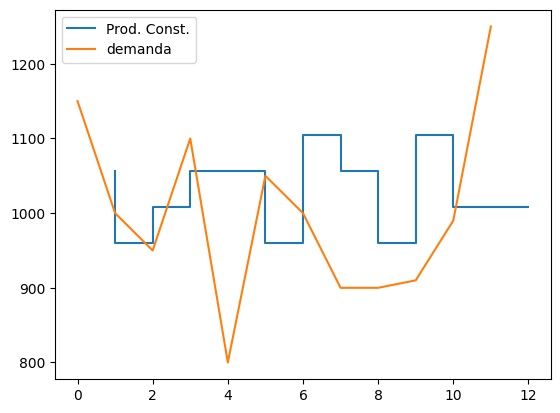

    No. Días  No. Personas  Tasa de producción    T.R.  Prod. Total  Demanda  \
1       22.0          13.0                88.0  1144.0       1144.0   1150.0   
2       20.0          12.0                80.0   960.0        960.0   1000.0   
3       21.0          11.0                84.0   924.0        924.0    950.0   
4       22.0          12.0                88.0  1056.0       1056.0   1100.0   
5       22.0           9.0                88.0   792.0        792.0    800.0   
6       20.0          13.0                80.0  1040.0       1040.0   1050.0   
7       23.0          10.0                92.0   920.0        920.0   1000.0   
8       22.0          10.0                88.0   880.0        880.0    900.0   
9       20.0          11.0                80.0   880.0        880.0    900.0   
10      23.0           9.0                92.0   828.0        828.0    910.0   
11      21.0          11.0                84.0   924.0        924.0    990.0   
12      21.0          14.0              

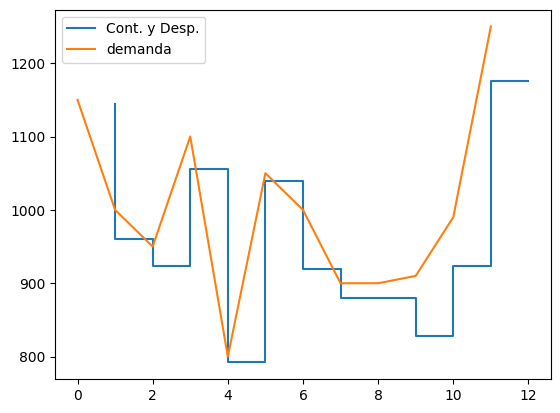

    No. Días  No. Personas  Tasa de producción    T.R.  Prod. Total  Demanda  \
1       22.0          14.0                88.0  1232.0       1232.0   1150.0   
2       20.0          13.0                80.0  1040.0       1040.0   1000.0   
3       21.0          12.0                84.0  1008.0       1008.0    950.0   
4       22.0          13.0                88.0  1144.0       1144.0   1100.0   
5       22.0          10.0                88.0   880.0        880.0    800.0   
6       20.0          14.0                80.0  1120.0       1120.0   1050.0   
7       23.0          11.0                92.0  1012.0       1012.0   1000.0   
8       22.0          11.0                88.0   968.0        968.0    900.0   
9       20.0          12.0                80.0   960.0        960.0    900.0   
10      23.0          10.0                92.0   920.0        920.0    910.0   
11      21.0          12.0                84.0  1008.0       1008.0    990.0   
12      21.0          15.0              

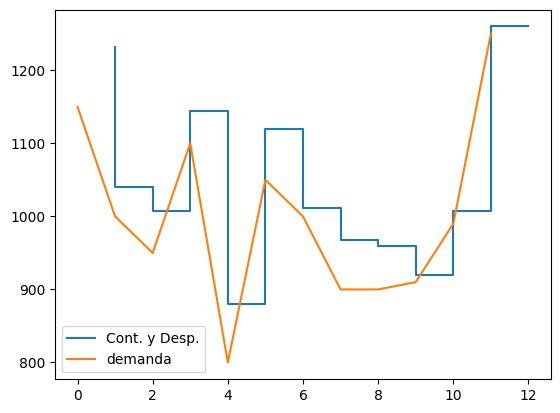

    No. Días  No. Personas  Tasa de producción    T.R.  Prod. Total  Demanda  \
1       22.0          13.0                88.0  1144.0       1144.0   1150.0   
2       20.0          12.0                80.0   960.0        960.0   1000.0   
3       21.0          11.0                84.0   924.0        924.0    950.0   
4       22.0          12.0                88.0  1056.0       1056.0   1100.0   
5       22.0           9.0                88.0   792.0        792.0    800.0   
6       20.0          13.0                80.0  1040.0       1040.0   1050.0   
7       23.0          11.0                92.0  1012.0       1012.0   1000.0   
8       22.0          10.0                88.0   880.0        880.0    900.0   
9       20.0          11.0                80.0   880.0        880.0    900.0   
10      23.0          10.0                92.0   920.0        920.0    910.0   
11      21.0          12.0                84.0  1008.0       1008.0    990.0   
12      21.0          15.0              

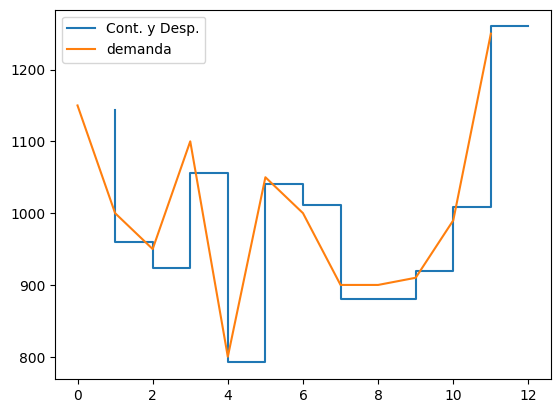

    No. Días  No. Personas  Tasa de producción   T.R.    T.S.  Prod. Total  \
1       22.0           5.0                88.0  440.0   99.00       539.00   
2       20.0           5.0                80.0  400.0   90.00       490.00   
3       21.0           5.0                84.0  420.0   94.50       514.50   
4       22.0           5.0                88.0  440.0   99.00       539.00   
5       22.0           5.0                88.0  440.0   99.00       539.00   
6       20.0           5.0                80.0  400.0   90.00       490.00   
7       23.0           5.0                92.0  460.0  113.85       573.85   
8       22.0           5.0                88.0  440.0   99.00       539.00   
9       20.0           5.0                80.0  400.0   90.00       490.00   
10      23.0           5.0                92.0  460.0  113.85       573.85   
11      21.0           5.0                84.0  420.0   94.50       514.50   
12      21.0           5.0                84.0  420.0   94.50   

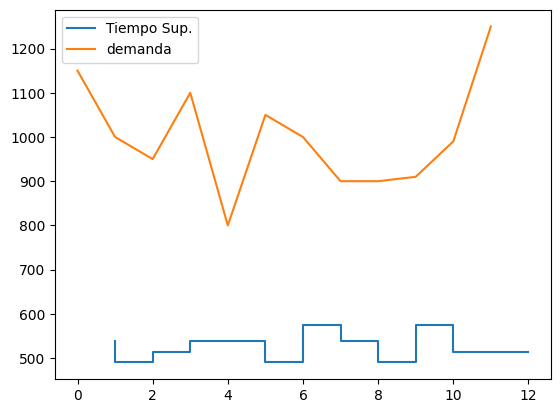

    No. Días  No. Personas  Tasa de producción   T.R.   M.A.  Prod. Total  \
1       22.0           5.0                88.0  440.0  210.0        650.0   
2       20.0           5.0                80.0  400.0  600.0       1000.0   
3       21.0           5.0                84.0  420.0  530.0        950.0   
4       22.0           5.0                88.0  440.0  660.0       1100.0   
5       22.0           5.0                88.0  440.0  360.0        800.0   
6       20.0           5.0                80.0  400.0  650.0       1050.0   
7       23.0           5.0                92.0  460.0  540.0       1000.0   
8       22.0           5.0                88.0  440.0  460.0        900.0   
9       20.0           5.0                80.0  400.0  500.0        900.0   
10      23.0           5.0                92.0  460.0  450.0        910.0   
11      21.0           5.0                84.0  420.0  570.0        990.0   
12      21.0           5.0                84.0  420.0  830.0       1250.0   

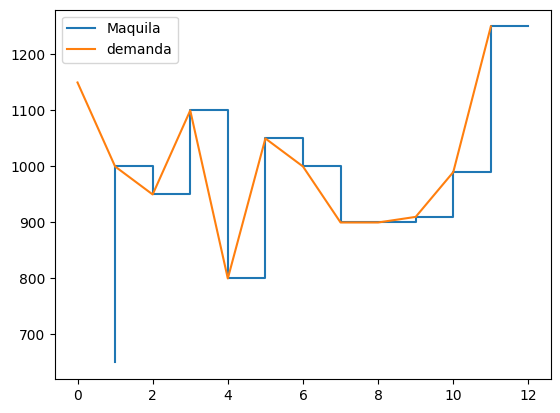

In [7]:
def pgp_balones(): # periodos, demanda, inventario inicial
  DA = 12000
  DM = DA//12 * np.ones(12)
  p = [1.15, 1, 0.95, 1.1, 0.8, 1.05, 1, 0.9, 0.9, 0.91, 0.99, 1.25]

  # print(f'¿1 =={np.mean(p)}?')
  dm = np.ceil(DM * p)
  dm[-3] += DA - int(sum(dm))
  print(dm)
  plt.plot(dm, label='demanda')
  plt.legend()
  plt.show()

  dias = [22, 20, 21, 22, 22, 20, 23, 22, 20, 23, 21, 21]

  tp = 4
  inv0 = 500
  c_inv = [150,75]
  c_fab  = 605 #7236928.06/603.0773383
  per0= 5
  contratar = 250
  despedir = 300
  ctr = 0
  cts = 700
  cma = 1000

  t1 = pgp_const(dm, tp, dias, inv0, c_inv, c_fab)
  t2 = pgp_conydes(dm, tp, dias, per0, c_fab, contratar, despedir)
  t3 = pgp_ts(dm, tp, dias, per0, 0.225, inv0, c_fab, ctr, cts, c_inv)
  t4 = pgp_ma(dm, tp, dias, per0, inv0, c_fab, cma, c_inv[0])

  i = 0
  for k in t1:
    print(k)
    texto = f'Constante {i}.xlsx'
    k.to_excel(texto)
    print('Costos:', sum(k['C. Escasez']) + sum(k['C. Fabricación']) + sum(k['C. Almacenamiento']))
    plt.step(np.arange(1,len(dm)+1), k['Prod. Total'], label='Prod. Const.')
    plt.plot(dm, label='demanda')
    plt.legend()
    plt.show()
    i +=1
  i = 0
  for k in t2:
    texto = f'ConyDesp  {i}.xlsx'
    i+=1
    k.to_excel(texto)
    print(k)
    print('Costos:',sum(k['C. Fabricación']+k['C. Cont.']+k['C. Despido']))
    plt.step(np.arange(1,len(dm)+1), k['Prod. Total'], label='Cont. y Desp.')
    plt.plot(dm, label='demanda')
    plt.legend()
    plt.show()

  t3.to_excel(f'ts.xlsx')
  print(t3)
  print('Costos:',sum(t3['C. Fabricación']+t3['C. Tiempo Regular']+t3['C. Tiempo Suplementario']+t3['C. Almacenamiento']+t3['C. Escasez']))
  plt.step(np.arange(1,len(dm)+1), t3['Prod. Total'], label='Tiempo Sup.')
  plt.plot(dm, label='demanda')
  plt.legend()
  plt.show()

  t3.to_excel(f'ma.xlsx')
  print(t4)
  print('Costos:',sum(t4['C. Fabricación']+t4['C. Maquila']+t4['C. Almacenamiento']))
  plt.step(np.arange(1,len(dm)+1), t4['Prod. Total'], label = 'Maquila')
  plt.plot(dm, label='demanda')
  plt.legend()
  plt.show()
pgp_balones()

##Balones

#Procedimientos


#Pruebas Procedimientos

***Manual***:

***Mecánico***:

***Automático***:

Dimensiones del balondel no.7

Diámetro: 24$cm$

Peso: 567 a 650 $g$

Caucho: \$1.70 el $kg$ = \$0.0017 el g

Densidad del caucho: aprox $1g/cm^3$

Cuero: \$7.5 el $dcm^2$ = \$7.5 cada $100cm^2$ = \$0.075 el $cm^2$

Superficie del balón:

$4\pi r^2 = 4\pi (12cm)^2 = 576\pi cm^2 \approx 1809.557368 cm^2$

Por lo que el cuero de un balón nos cuesta: $\frac{\$0.075}{dcm^2}(576\pi cm^2) = \$\frac{216}{5}π ≈ \$135.7168 $

Note que

$$ ρ = \frac{masa}{volumen} = \frac{m}{V} $$
$$ ⇒ m = ρV $$

Con lo cual, al suponer una capa esfétrica hueca de grosor $1mm$ llamada cámara de balón, cuyo radio es $12cm$. Entonces para calcular su volumen:

$$V = \frac{4}{3}π(12cm)^3 - \frac{4}{3}π(11.8cm)^3 = \frac{4}{3}π(1728cm^3 - 1643.032cm^3) $$
$$ = \frac{4}{3}π(84.968cm^3) = \frac{42841}{750}πcm^3 \approx 355.91312612cm^3 $$

Liego, la masa de esa cámara es de $355.9131/g$

Por ende, el caucho para un balón nos cuesta: $ \$1.7 * 0.3559131 ≈ \$0.60505 $

Además, el proceso de vulcanización del caucho nos cuesta $\frac{150}{2539.3852526137875} ≈ $0.059 cada cm^2$

Por lo que vulcanizar la cámara nos cuesta $\$20.998874441$

In [8]:
precio_ml = (10446.6/3785.41)
print(precio_ml*90.4778)


249.69168081660908


In [9]:
salario_minimo = 248.93 #pesos diarios
salario_minimo = 250 #pesos diarios

volumen = 4/3 * np.pi * (12**3-11.8**3)
superficie = 4 * np.pi * 12**2

print(volumen,'m^3')
print(superficie,'m^2')

355.91312612028844 m^3
1809.5573684677208 m^2


In [10]:
def procedimiento_manual(no_balones=1, no_trabajadores=1, camaras_por_pedido = 100):
  #----------------------------Dimensiones del balón----------------------------
  volumen = 4/3 * np.pi * (12**3-11.8**3)
  superficie = 4 * np.pi * 12**2

  #---------------------Cantidad de materia prima por balón---------------------
  camara = 1
  cuero = superficie #m^2
  pegamento = 90.4778 #ml
  hilo = 100 #m

  #-----------------------------------Pedidos-----------------------------------
  if no_balones % camaras_por_pedido == 0:
    no_pedidos = no_balones/camaras_por_pedido
  else:
    no_pedidos = no_balones//camaras_por_pedido + 1

  #-----------------------------------Precios-----------------------------------
  p_pedido = 100
  p_camara = 42.5 #cada camara
  p_cuero =  0.075 #cmˆ2
  p_pegamento = 2.7597 #ml
  p_hilo = 1.92 #m
  sueldo = 250 * 257 #al año por persona

  #-----------------------------Tiempos por proceso-----------------------------
  t_pedido_camara = 72 #horas
  t_cuero = 1/60 #horas
  t_pegamento = 2/60 #horas
  t_secado = 1
  t_hilo = 5/60 #horas

  #---------------------------Total de materia prima----------------------------
  cant_camara = no_balones*camara
  cant_cuero = no_balones*cuero
  cant_pegamento = no_balones*pegamento
  cant_hilo = no_balones*hilo
  mat_prima = {'camara':cant_camara, 'cuero':cant_cuero, 'pegamento':cant_pegamento, 'hilo':cant_hilo}

  #--------------------------Total de costos y tiempos--------------------------
  costo = cant_camara*p_camara + cant_cuero*p_cuero + cant_pegamento*p_pegamento + p_hilo * cant_hilo +no_pedidos*p_pedido
  if no_trabajadores > 0:
    costo += no_trabajadores*sueldo
    tiempo = no_pedidos * t_pedido_camara + (t_cuero + t_pegamento + t_hilo + t_secado)*no_balones /no_trabajadores
  else:
    tiempo = no_pedidos * t_pedido_camara + (t_cuero + t_pegamento + t_hilo + t_secado)*no_balones

  return mat_prima, costo, tiempo

In [11]:
def procedimiento_mecanico(no_balones=1, no_trabajadores=1, cap_maq = 5):
  #----------------------------Dimensiones del balón----------------------------
  volumen = 4/3 * np.pi * (12**3-11.8**3)
  superficie = 4 * np.pi * 12**2

  #----------------------------Inversion en máquinas----------------------------
  inv_vulcanizado = 10**4 #provisional
  inv_hilo = 10**4        #provicional
  inv_pegado =10**4       #provixional

  #---------------------Cantidad de materia prima por balón---------------------
  caucho = volumen
  cuero = superficie
  pegamento = 90.4778 *0.7 #ml
  hilo = 100*0.98 #m

  #-----------------------------------Precios-----------------------------------
  p_caucho = 0.0017 + 0.059 #cm^3
  p_cuero =  0.075 #cmˆ2
  p_pegamento = 2.7597 #ml
  p_hilo = 1.92 #m
  sueldo = 750 * 257 #al año por persona.       B cambiar

  #-----------------------------Tiempos por proceso-----------------------------
  t_caucho = 2/60 #horas
  t_cuero = 1/60 #horas
  t_vulcanizado = 5/60 #horas
  t_pegamento = 1/60 #horas
  t_secado = 1 #horas
  t_hilo = 1/60 #horas

  #----------------------------Uso de la maquinaria-----------------------------
  # cap_maq = 5
  if no_balones % cap_maq == 0:
    usos_maq = no_balones / cap_maq
  else:
    usos_maq = no_balones // cap_maq + 1

  #---------------------------Total de materia prima----------------------------
  cant_caucho = no_balones*caucho
  cant_cuero = no_balones*cuero
  cant_pegamento = no_balones*pegamento
  cant_hilo = no_balones*hilo
  mat_prima = {'caucho':cant_caucho, 'cuero':cant_cuero, 'pegamento':cant_pegamento, 'hilo':cant_hilo}

  #--------------------------Total de costos y tiempos--------------------------
  costo = cant_caucho*p_caucho + cant_cuero*p_cuero + cant_pegamento*p_pegamento + p_hilo*cant_hilo + inv_vulcanizado + inv_hilo + inv_pegado
  tiempo = usos_maq*(t_vulcanizado+t_pegamento+t_hilo)
  if no_trabajadores > 0:
    costo += no_trabajadores*sueldo
    tiempo += (t_caucho + t_cuero + t_secado)*no_balones /no_trabajadores
  else:
    tiempo += (t_caucho + t_cuero + t_secado)*no_balones

  return mat_prima, costo, tiempo

In [12]:
def procedimiento_automatico(no_balones=1, no_trabajadores=1, cap_maq = 5):
  #----------------------------Dimensiones del balón----------------------------
  volumen = 4/3 * np.pi * (12**3-11.8**3)
  superficie = 4 * np.pi * 12**2

  #----------------------------Inversion en máquinas----------------------------
  inv_cortado = 10**4     #prov
  inv_vulcanizado = 10**4 #provisional
  inv_hilo = 10**4        #provicional
  inv_pegado = 10**4      #provixional
  inv_bandas = 12 * 12==3      #probisional


  #---------------------Cantidad de materia prima por balón---------------------
  caucho = volumen
  cuero = superficie
  pegamento = 90.4778 * 0.7 #ml
  hilo = 100 * 0.98 #m

  #-----------------------------------Precios-----------------------------------
  p_caucho = 0.0017 + 0.059 #cm^3
  p_cuero =  0.075 #cmˆ2
  p_pegamento = 2.7597 #ml
  p_hilo = 1.92 #m
  sueldo = 2500 * 257 #al año por persona.       B cambiar

  #-----------------------------Tiempos por proceso-----------------------------
  t_caucho = 5/360 #horas
  t_cuero = 5/360 #horas
  t_vulcanizado = 5/60 #horas
  t_pegamento = 5/60 #horas
  t_hilo = 5/60 #horas

  #----------------------------Uso de la maquinaria-----------------------------
  cap_maq = 5
  if no_balones % cap_maq == 0:
    usos_maq = no_balones / cap_maq
  else:
    usos_maq = no_balones // cap_maq + 1

  #---------------------------Total de materia prima----------------------------
  cant_caucho = no_balones*caucho
  cant_cuero = no_balones*cuero
  cant_pegamento = no_balones*pegamento
  cant_hilo = no_balones*hilo
  mat_prima = {'caucho':cant_caucho, 'cuero':cant_cuero, 'pegamento':cant_pegamento, 'hilo':cant_hilo}

  #--------------------------Total de costos y tiempos--------------------------
  costo = cant_caucho*p_caucho + cant_cuero*p_cuero + cant_pegamento*p_pegamento + p_hilo*cant_hilo + inv_bandas + inv_cortado + inv_vulcanizado + inv_hilo + inv_pegado + no_trabajadores*sueldo
  tiempo = usos_maq*(t_cuero + t_caucho + t_vulcanizado + t_pegamento + t_hilo)

  return mat_prima, costo, tiempo

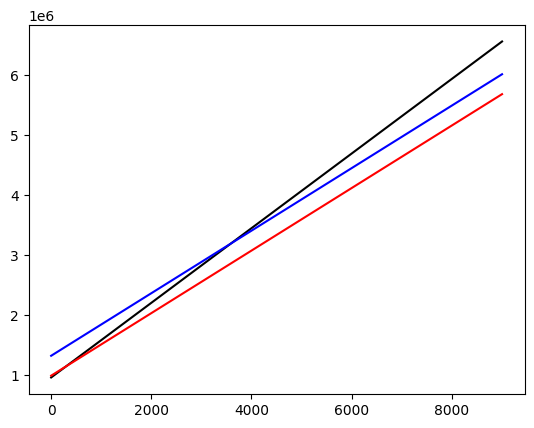

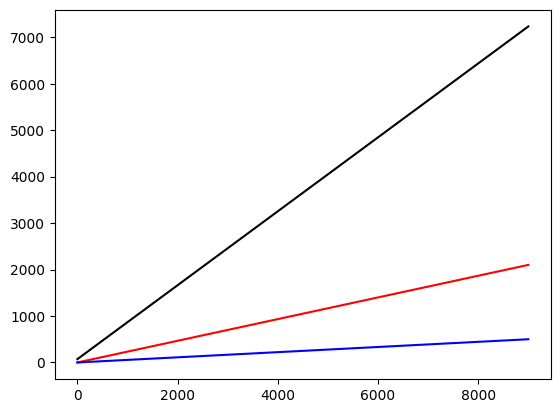

In [13]:
dem = 12000
a, b, c = [], [], []
x, y, z = [], [], []
# x = np.arange(10**10,10**10 + 100, 10)
r = np.arange(1,10000+1,1000)
for i in r:
  costo1, tiempo1 = procedimiento_manual(i,15,100)[1:]
  costo2, tiempo2 = procedimiento_mecanico(i,5)[1:]
  costo3, tiempo3 = procedimiento_automatico(i,2,100)[1:]
  a.append(costo1)
  b.append(costo2)
  c.append(costo3)
  x.append(tiempo1)
  y.append(tiempo2)
  z.append(tiempo3)

plt.plot(r,a,color='black')
plt.plot(r,b,color='red')
plt.plot(r,c,color='blue')
plt.show()

plt.plot(r,x,color='black')
plt.plot(r,y,color='red')
plt.plot(r,z,color='blue')
plt.show()

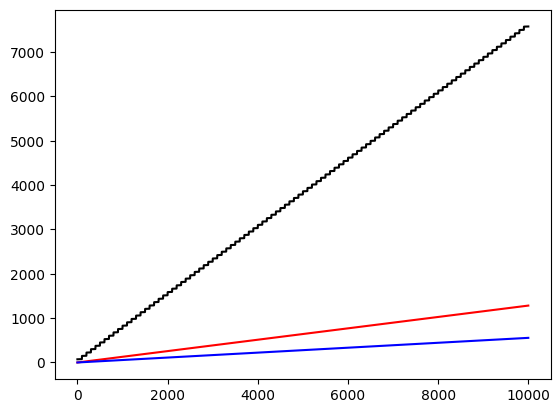

In [14]:
dem = 12000
a, b, c = [], [], []
# x = np.arange(10**10,10**10 + 100, 10)
x = np.arange(1,10000)
for i in x:
  a.append(procedimiento_manual(i,30,100)[2])
  b.append(procedimiento_mecanico(i,10)[2])
  c.append(procedimiento_automatico(i,3)[2])

plt.plot(x,a,color='black')
plt.plot(x,b,color='red')
plt.plot(x,c,color='blue')
plt.show()

Demanda anual = 359181

#Descarte

##Pruebas PGP

    No. Días  No. Personas  Tasa de producción     T.R.  Prod. Total  Demanda  \
1        1.0          10.0              1500.0  15000.0      15000.0  12000.0   
2        1.0          10.0              1500.0  15000.0      15000.0  18000.0   
3        1.0          10.0              1500.0  15000.0      15000.0  18000.0   
4        1.0          10.0              1500.0  15000.0      15000.0  12000.0   
5        1.0          10.0              1500.0  15000.0      15000.0   9000.0   
6        1.0          10.0              1500.0  15000.0      15000.0  12000.0   
7        1.0          10.0              1500.0  15000.0      15000.0   9000.0   
8        1.0          10.0              1500.0  15000.0      15000.0  18000.0   
9        1.0          10.0              1500.0  15000.0      15000.0  24000.0   
10       1.0          10.0              1500.0  15000.0      15000.0  21000.0   
11       1.0          10.0              1500.0  15000.0      15000.0  18000.0   
12       1.0          10.0  

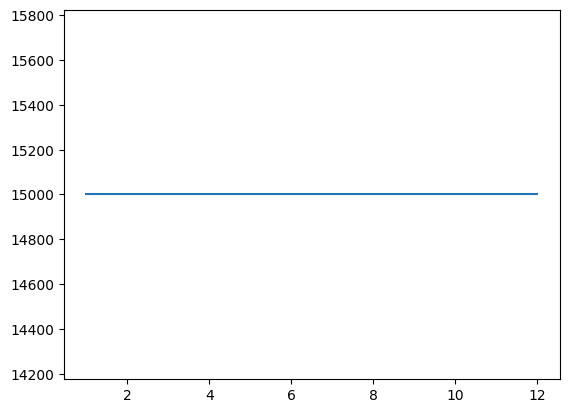

    No. Días  No. Personas  Tasa de producción     T.R.  Prod. Total  Demanda  \
1        1.0           8.0              1500.0  12000.0      12000.0  12000.0   
2        1.0          12.0              1500.0  18000.0      18000.0  18000.0   
3        1.0          12.0              1500.0  18000.0      18000.0  18000.0   
4        1.0           8.0              1500.0  12000.0      12000.0  12000.0   
5        1.0           6.0              1500.0   9000.0       9000.0   9000.0   
6        1.0           8.0              1500.0  12000.0      12000.0  12000.0   
7        1.0           6.0              1500.0   9000.0       9000.0   9000.0   
8        1.0          12.0              1500.0  18000.0      18000.0  18000.0   
9        1.0          16.0              1500.0  24000.0      24000.0  24000.0   
10       1.0          14.0              1500.0  21000.0      21000.0  21000.0   
11       1.0          12.0              1500.0  18000.0      18000.0  18000.0   
12       1.0           6.0  

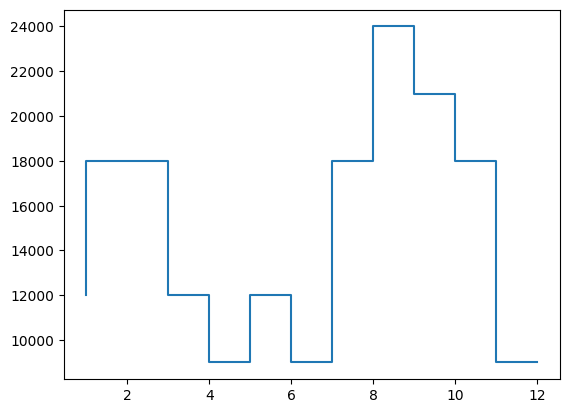

In [15]:
dem = 10**3 * np.array([12, 18, 18, 12, 9, 12, 9, 18, 24, 21, 18, 9])
dias = np.ones(len(dem))
tp = 1500
i = 15000

cf = 21.25/6
ci = cf * 0.15

lt = pgp_const(dem, tp, dias, i, ci, cf)
for k in range(len(lt)):
  print(lt[k])
  prod = lt[k]['Prod. Total']
  plt.step(np.arange(1,len(dem)+1), prod)
  plt.show()

p = 10

lt = pgp_conydes(dem, tp, dias, p, cf, 400, 250)
for k in range(len(lt)):
  print(lt[k])
  prod = lt[k]['Prod. Total']
  plt.step(np.arange(1,len(dem)+1), prod)
  plt.show()

38
   No. Días  No. Personas  Tasa de producción   T.R.    T.S.  Prod. Total  \
1      22.0          38.0                17.6  668.8  150.48       819.28   
2      18.0          38.0                14.4  547.2  136.80       684.00   
3      21.0          38.0                16.8  638.4  159.60       798.00   
4      22.0          38.0                17.6  668.8    0.00       668.80   
5      22.0          38.0                17.6  668.8    0.00       668.80   
6      20.0          38.0                16.0  608.0    0.00       608.00   

   Demanda  Inv. I.  Inv. F.  C. Fabricación  C. Tiempo Regular  \
1    600.0  -500.00   319.28        163856.0             3344.0   
2   1000.0  -680.72     3.28        136800.0             2736.0   
3    800.0  -796.72     1.28        159600.0             3192.0   
4    350.0  -348.72   320.08        133760.0             3344.0   
5    400.0   -79.92   588.88        133760.0             3344.0   
6    600.0   -11.12   596.88        121600.0           

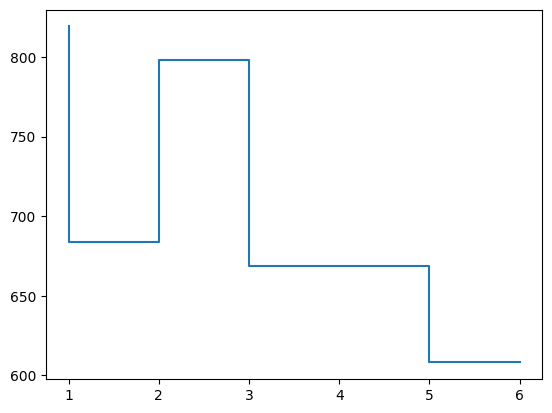

   No. Días  No. Personas  Tasa de producción   T.R.    M.A.  Prod. Total  \
1      22.0          20.0                17.6  352.0   148.0        500.0   
2      18.0          20.0                14.4  288.0   712.0       1000.0   
3      21.0          20.0                16.8  336.0   464.0        800.0   
4      22.0          20.0                17.6  352.0     0.0        352.0   
5      22.0          20.0                17.6  352.0  1370.0       1722.0   
6      20.0          20.0                16.0  320.0   280.0        600.0   

   Demanda  Inv. I.  Inv. F.  C. Fabricación  C. Maquila  C. Almacenamiento  
1    600.0   -500.0      0.0        125000.0     31080.0                0.0  
2   1000.0  -1000.0      0.0        250000.0    149520.0                0.0  
3    800.0   -800.0      0.0        200000.0     97440.0                0.0  
4    350.0   -350.0  -1322.0         88000.0         0.0                0.0  
5    400.0  -1722.0      0.0        430500.0    287700.0              

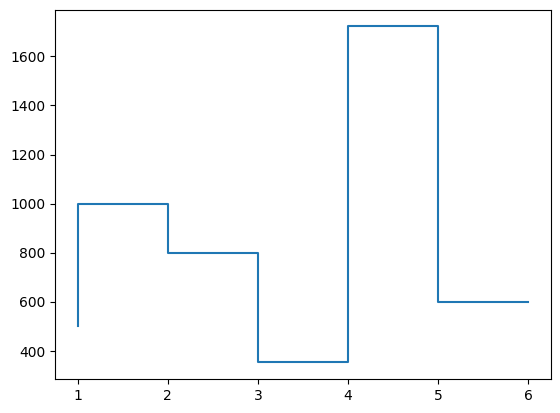

In [16]:
dem = 100 * np.array([6, 10, 8, 3.5, 4, 6])
tp = 0.8
dias = np.array([22, 18, 21, 22, 22, 20])
a = pgp_ts(dem,tp,dias, 38, 0.25, 100,200, 5, 7/4, (2.5,20))

print(a)
plt.step(np.arange(1,len(dem)+1), a['Prod. Total'])
plt.show()

b = pgp_ma(dem,tp,dias, 20, 100, 250, 210, 2.5)
print(b)
plt.step(np.arange(1,len(dem)+1), b['Prod. Total'])
plt.show()

In [17]:
dias = [22, 20, 21, 22, 22, 20, 23, 22, 20, 23, 21, 21]
print(sum(dias))
sueldo = 250
print()
print(sum(dias) * 250, 'manual')
print(3 * sum(dias) * 250, 'mecanizado')
print(10 * sum(dias) * 250, 'automatico')

257

64250 manual
192750 mecanizado
642500 automatico


In [18]:

precio = 150
R = 56.375
r = 35.56
grosor = 2.5
ancho = 19
v1 =np.pi * (R - (R-grosor))**2 * ancho
v2 = 2 * (R - r)**2 * grosor
v = v1+v2
print('presio',precio/v)

print(v1,v2,v1+v2)

print(150/153468.50)
pv = 0.059

presio 0.059069414475651186
373.06412761378795 2166.3211249999995 2539.3852526137875
0.0009773992708601439


In [19]:
R = 12

S = 4*np.pi*R**2
print('Superficie del balón',S,'m^2')
for g in range(1,20+1):
  grosor = g/10
  r = 12 - grosor
  V = 4/3 * np.pi * (R**3 - r**3)
  print(V)
  costo = 0.0017
  print(f'Una cámara de grosor {grosor}cm cuesta: ${round(V*costo, 5)}')

Superficie del balón 1809.5573684677208 m^2
179.45196116325332
Una cámara de grosor 0.1cm cuesta: $0.30507
355.91312612028844
Una cámara de grosor 0.2cm cuesta: $0.60505
529.4086276123392
Una cámara de grosor 0.3cm cuesta: $0.89999
699.9635983806252
Una cámara de grosor 0.4cm cuesta: $1.18994
867.6031711663811
Una cámara de grosor 0.5cm cuesta: $1.47493
1032.3524787108342
Una cámara de grosor 0.6cm cuesta: $1.755
1194.2366537552136
Una cámara de grosor 0.7cm cuesta: $2.0302
1353.2808290407502
Una cámara de grosor 0.8cm cuesta: $2.30058
1509.5101373086673
Una cámara de grosor 0.9cm cuesta: $2.56617
1662.9497113001971
Una cámara de grosor 1.0cm cuesta: $2.82701
1813.6246837565673
Una cámara de grosor 1.1cm cuesta: $3.08316
1961.5601874190083
Una cámara de grosor 1.2cm cuesta: $3.33465
2106.78135502875
Una cámara de grosor 1.3cm cuesta: $3.58153
2249.313319327016
Una cámara de grosor 1.4cm cuesta: $3.82383
2389.1812130550375
Una cámara de grosor 1.5cm cuesta: $4.06161
2526.4101689540444
U

In [20]:
R = 12

S = 4*np.pi*R**2
print('Superficie del balón',S,'m^2')

r = 11.8
print(R**3,r**3)
print(R**3 - r**3)
V = 4/3 * np.pi * (R**3 - r**3)
print(V)
print('precio vulvanizado =',V*pv)
costo = 0.0017
print(f'Una cámara de grosor {2}mm cuesta: ${round(V*costo, 5)}')
print(1.7 * 0.3559131)

Superficie del balón 1809.5573684677208 m^2
1728 1643.0320000000004
84.96799999999962
355.91312612028844
precio vulvanizado = 20.998874441097016
Una cámara de grosor 2mm cuesta: $0.60505
0.60505227


In [21]:
def prod_balon(n):
  caucho = 17638.49 #2
  camara = 1 #camara de aire ya fabricada
  cuero = 17638.49 #m2
  pegamento = 2 #ml
  hilo = 3 #m

  p_camara = 0.045
  p_cuero =  0.042 #ml provixional
  p_pegamento = 0.0014# provixional
  p_hilo = 0.0002 # provisional

  t_camara = .045
  t_cuero = .002 #provisional
  t_pegamento = 0.0000014 #provixional
  t_hilo = 0.0000002 #provisional

  cant_camara = n*camara
  cant_cuero = n*cuero
  cant_pegamento = n*pegamento
  cant_hilo = n*hilo

  costo = cant_camara*p_camara + cant_cuero*p_cuero + cant_pegamento*p_pegamento + p_hilo * cant_hilo
  tiempo = t_camara + (t_cuero + t_pegamento + t_hilo)*n
  return costo, tiempo

In [22]:
if __name__ == '__main__':
  n = 200
  c, t = prod_balon(n)
  costo = '$'+str(round(c,2))
  tiempo = str(round(t,8))+' dìas'
  print(costo)
  print(tiempo)

$148173.0
0.44532 dìas


In [23]:
dem = 359181
print(dem*0.035)

12571.335000000001
